In [36]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv(r'Inserte ruta aqui')

In [21]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


In [22]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [23]:
df.dtypes
# Objeto en dtype se interpreta como string pero no se pueden utilizar los metodos de string 

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [24]:
df["work_year"].describe()

count    3755.000000
mean     2022.373635
std         0.691448
min      2020.000000
25%      2022.000000
50%      2022.000000
75%      2023.000000
max      2023.000000
Name: work_year, dtype: float64

In [25]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [26]:
df.shape[0]

3755

In [27]:
# Esta funcion cuenta cuantas lineas hay duplicadas no cuantos valores
df.duplicated().sum()

np.int64(1171)

Eliminar los duplicados de este df

In [28]:
df = df.drop_duplicates()
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## EDA: 
#### Exploratory data analysis

Cual es el tipo de empleo que gana mas dinero?

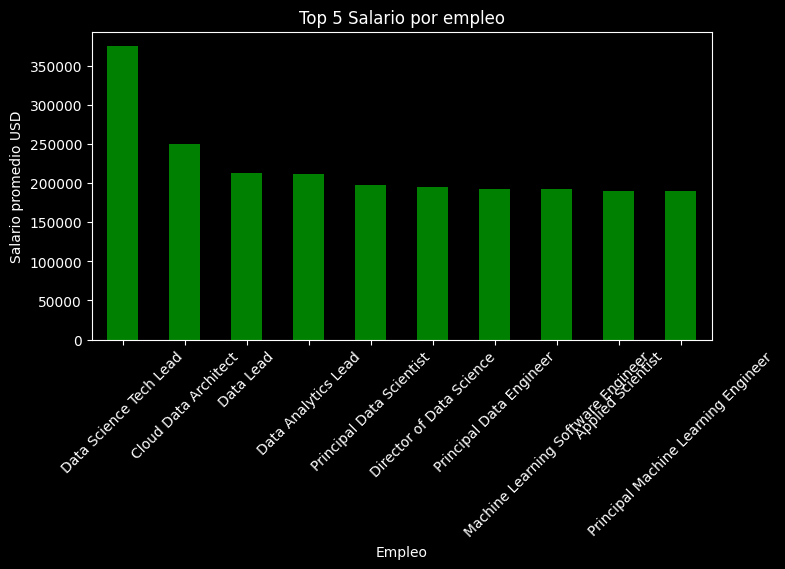

In [29]:
top_10 = df.groupby("job_title")['salary_in_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
top_10.plot(kind='bar', color='#008000')
plt.title('Top 5 Salario por empleo')
plt.xlabel('Empleo')
plt.ylabel('Salario promedio USD')
plt.xticks(rotation=45)
plt.show()


Dónde estan localizadas las compañias que más pagan?

In [30]:
company_5 = df.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False).head(5)

Cual es el empleo que permite mas trabajo remoto?

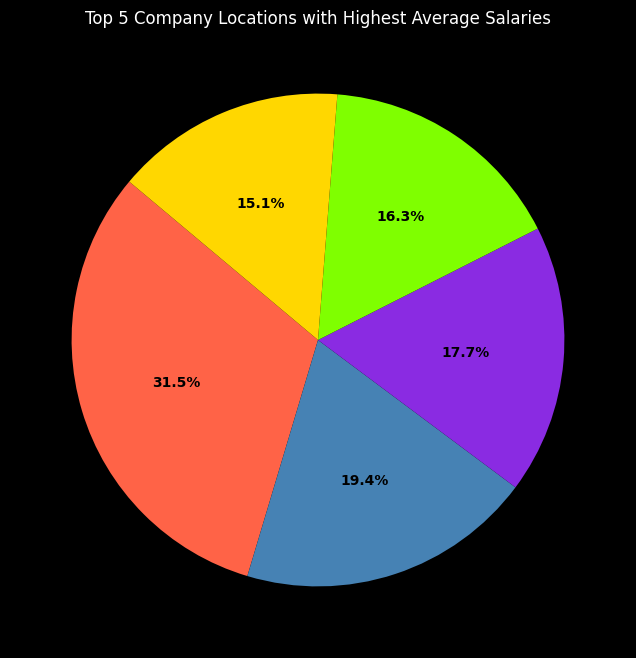

In [31]:
#revisar
#df.groupby("remote_ratio")["employment_type"].value_counts().head(1)
#calcula la media por cada job title, lo ordena de mayor a menor y muestro los 5 primeros
# ya que solo el primero no me parecia significativo en este dataframe porque tienen los mismos valores

df.groupby("job_title")["remote_ratio"].mean().sort_values(ascending=False).head(5)

plt.style.use('dark_background')
colors = ['#FF6347', '#4682B4', '#8A2BE2', '#7FFF00', '#FFD700']
plt.figure(figsize=(8, 8))
plt.pie(company_5, labels=company_5.index, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color': 'black', 'fontweight': 'bold'})
plt.title('Top 5 Company Locations with Highest Average Salaries', color='white')

plt.show()





Cual es el salario promedio de los empleados de Data Scientist?

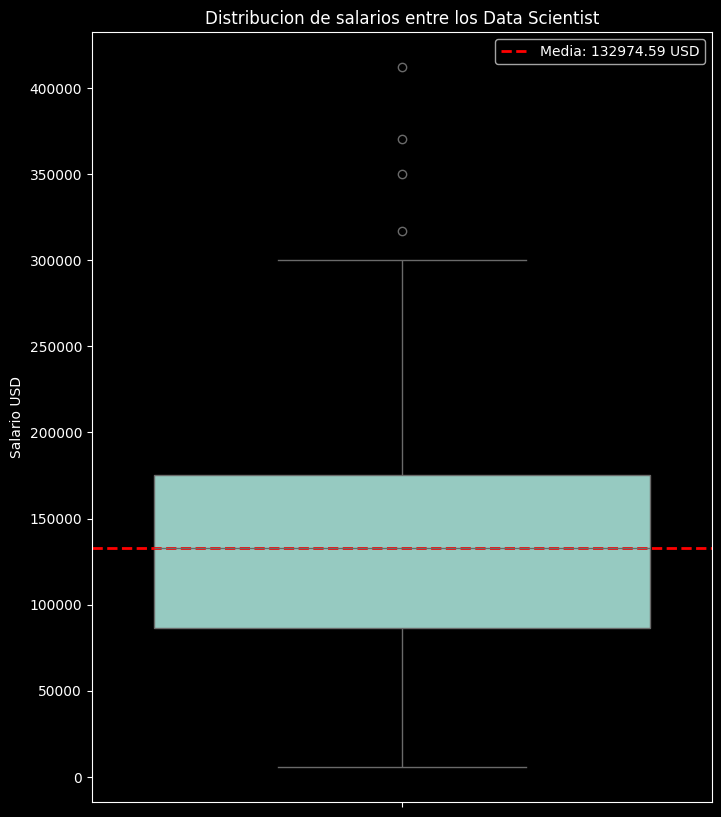

In [32]:
df_scientists = df[df["job_title"] == "Data Scientist"]
media = df_scientists["salary_in_usd"].mean()

plt.figure(figsize=(8,10))
sns.boxplot(y=df_scientists['salary_in_usd'])
plt.ylabel('Salario USD')
plt.title('Distribucion de salarios entre los Data Scientist')
plt.axhline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f} USD')
plt.legend()
plt.show()

Cuantas personas ganan por encima de los 200 000?

<function matplotlib.pyplot.show(close=None, block=None)>

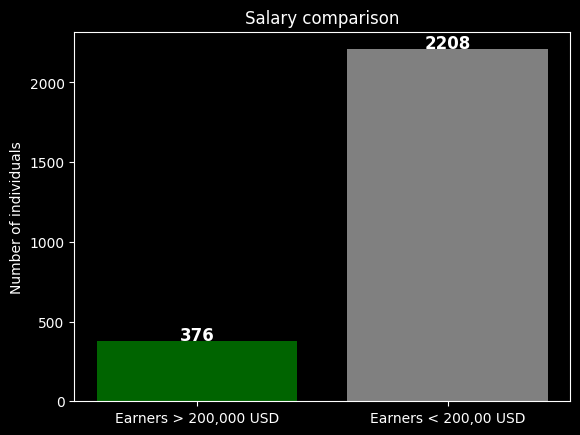

In [33]:
earners = df[df["salary_in_usd"] > 200_000].shape[0]
total = df.shape[0]
others = total-earners

plt.bar(['Earners > 200,000 USD', 'Earners < 200,00 USD'], [earners, others], color=['darkgreen', 'gray'])
plt.title("Salary comparison")
plt.ylabel('Number of individuals')

for index, value in enumerate([earners, others]):
    plt.text(index, value + 5, str(value), ha='center', fontweight='bold', fontsize=12, color='white')
plt.show

Cual es el salario promedio de los empleados Data Modeler en SE?

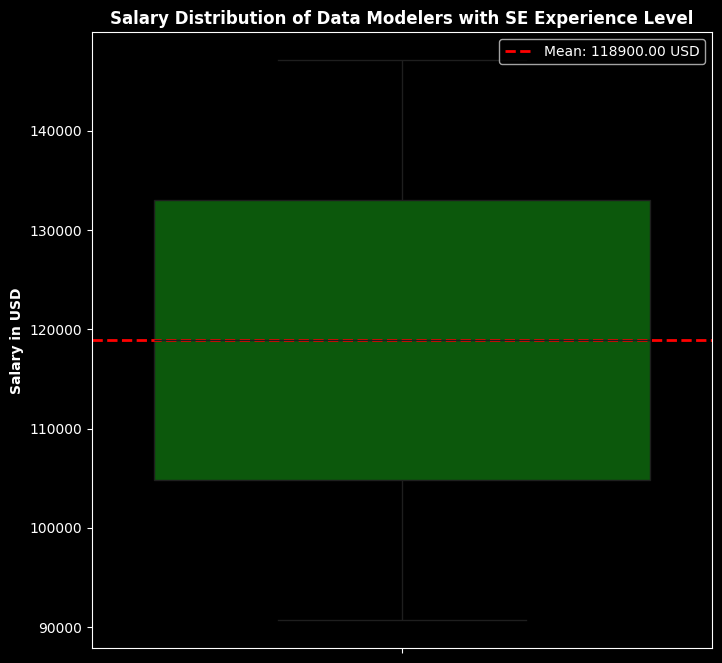

In [34]:
df_data = df[(df["job_title"] == "Data Modeler") & (df["experience_level"] == "SE")]
mean_s = df_data["salary_in_usd"].mean()

plt.figure(figsize=(8, 8))
sns.boxplot(y=df_data['salary_in_usd'], color='darkgreen')
plt.axhline(mean_s, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_s:.2f} USD')
plt.title('Salary Distribution of Data Modelers with SE Experience Level', fontweight='bold')
plt.ylabel('Salary in USD', fontweight='bold')
plt.legend()
plt.show()

Para los ML Engineer, que diferencia de salario hay entre full time y part time?

In [37]:
PT = df[(df["job_title"] == "ML Engineer") & (df["employment_type"] == "FT")]
FT = df[(df["job_title"] == "ML Engineer") & (df["employment_type"] == "PT")]

salary_PT = PT["salary_in_usd"].mean()
salary_FT = FT["salary_in_usd"].mean()

fig = go.Figure()
fig.add_trace(go.Pie(
    labels=['Full-Time', 'Part-Time'],
    values=[salary_PT, salary_FT],
    hoverinfo='label+percent+value',  # Shows label, percentage, and value on hover
    textinfo='label+value',  # Displays label and value directly on the chart
    marker=dict(colors=['darkgreen', 'gray']),  # Defines colors for the slices
))

fig.update_layout(
    title='Average Salary of ML Engineers by Employment Type',
    template='plotly_dark'  # Applies a dark theme to the chart
)
fig.show()

Cual es el employment type mas frecuente entre los Business Data Analyst

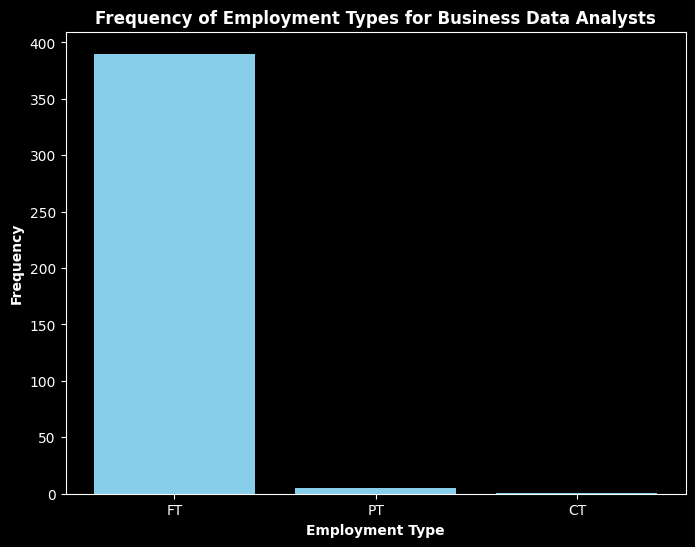

In [40]:
mf_type = df[df["job_title"] == "Data Analyst"]["employment_type"].mode()[0]
count = df[df["job_title"] == "Data Analyst"]["employment_type"].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(count.index, count.values, color='skyblue')
plt.title('Frequency of Employment Types for Business Data Analysts', fontweight='bold')
plt.xlabel('Employment Type', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
for index, value in enumerate(count.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontweight='bold', fontsize=12, color='black')
plt.show()


En qué país, en cuanto a localización de la compañía, hay mayor ratio de teletrabajo?

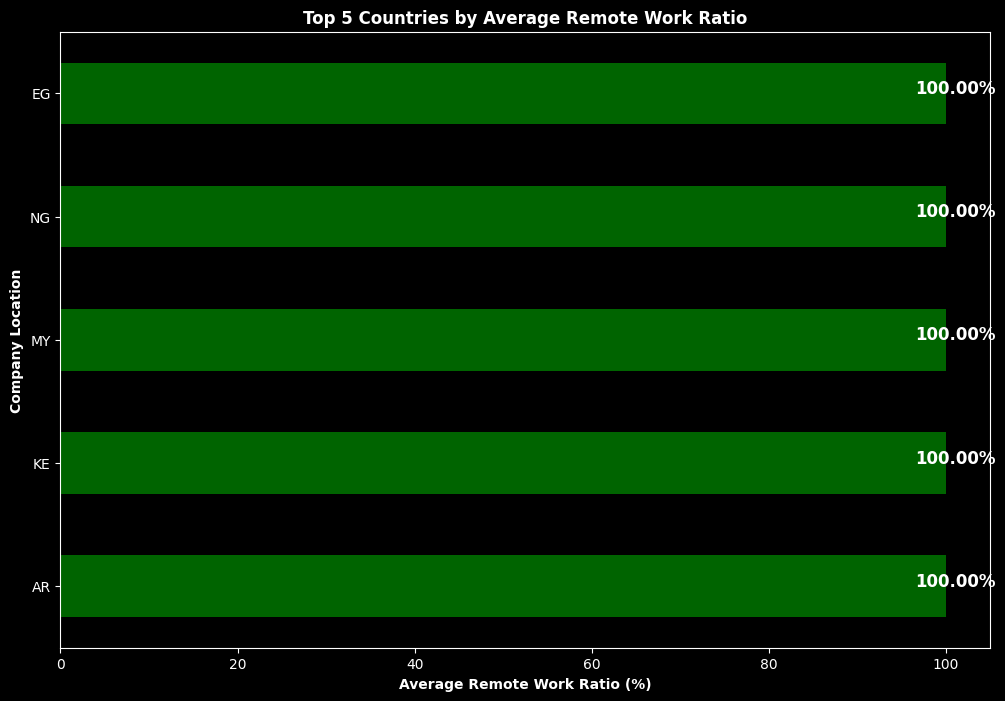

In [43]:
teletrab = df.groupby("company_location")["remote_ratio"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
teletrab.head(5).plot(kind='barh', color='darkgreen')
plt.title('Top 5 Countries by Average Remote Work Ratio', fontweight='bold')
plt.xlabel('Average Remote Work Ratio (%)', fontweight='bold')
plt.ylabel('Company Location', fontweight='bold')
for index, value in enumerate(teletrab.head(5).values):
    plt.text(value + 1, index, f'{value:.2f}%', ha='center', fontweight='bold', fontsize=12, color='white')
plt.show()
